Epoch 1/5
196/196 - 3s - loss: 0.4988 - accuracy: 0.7346 - val_loss: 0.3115 - val_accuracy: 0.8660 - 3s/epoch - 14ms/step
Epoch 2/5
196/196 - 2s - loss: 0.1932 - accuracy: 0.9270 - val_loss: 0.3112 - val_accuracy: 0.8693 - 2s/epoch - 9ms/step
Epoch 3/5
196/196 - 2s - loss: 0.0719 - accuracy: 0.9834 - val_loss: 0.3532 - val_accuracy: 0.8644 - 2s/epoch - 10ms/step
Epoch 4/5
196/196 - 2s - loss: 0.0224 - accuracy: 0.9971 - val_loss: 0.3970 - val_accuracy: 0.8625 - 2s/epoch - 10ms/step
Epoch 5/5
196/196 - 2s - loss: 0.0073 - accuracy: 0.9996 - val_loss: 0.4342 - val_accuracy: 0.8614 - 2s/epoch - 9ms/step

ANN Test Accuracy: 0.8614
Epoch 1/5
196/196 - 4s - loss: 0.4938 - accuracy: 0.7276 - val_loss: 0.3145 - val_accuracy: 0.8643 - 4s/epoch - 19ms/step
Epoch 2/5
196/196 - 2s - loss: 0.1649 - accuracy: 0.9398 - val_loss: 0.3565 - val_accuracy: 0.8596 - 2s/epoch - 12ms/step
Epoch 3/5
196/196 - 2s - loss: 0.0307 - accuracy: 0.9920 - val_loss: 0.5088 - val_accuracy: 0.8491 - 2s/epoch - 12ms/step

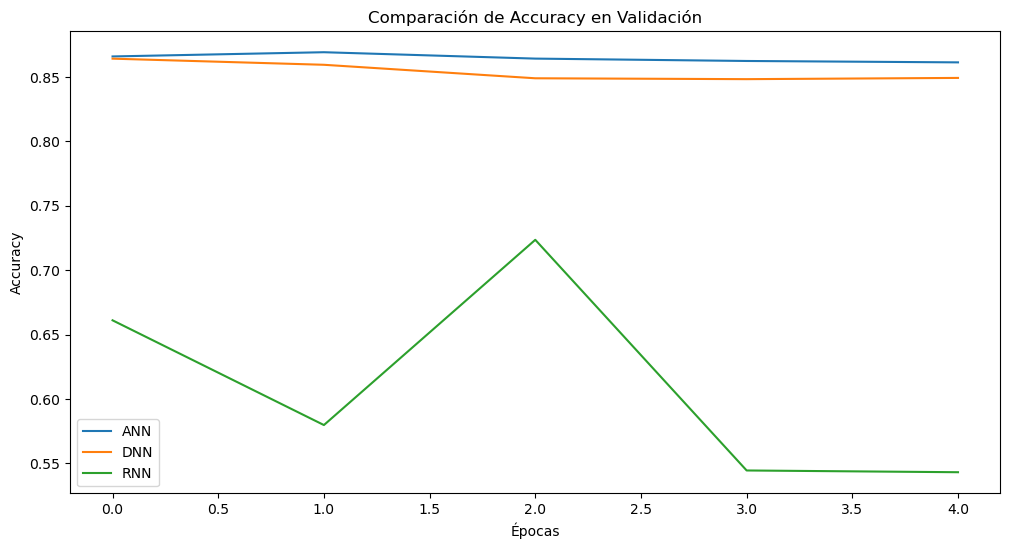

In [2]:
# Importar librerías
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Flatten
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros
vocab_size = 10000   # Tamaño del vocabulario
max_length = 200     # Longitud máxima de cada secuencia
embedding_dim = 32   # Dimensión de los embeddings
batch_size = 128     # Tamaño del batch
epochs = 5           # Número de épocas

# Cargar y preprocesar el dataset IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

# Función para entrenar y evaluar modelos
def train_and_evaluate(model, name):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=2)
    _, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{name} Test Accuracy: {test_acc:.4f}")
    return history, test_acc

# 1. Modelo ANN
model_ann = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Modelo DNN corregido
model_dnn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Flatten(),                          # Aplasta las salidas
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')      # Una única salida para clasificación binaria
])


# 3. Modelo RNN
model_rnn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    SimpleRNN(32, return_sequences=False),
    Dense(1, activation='sigmoid')
])

# Entrenar y evaluar los modelos
hist_ann, acc_ann = train_and_evaluate(model_ann, "ANN")
hist_dnn, acc_dnn = train_and_evaluate(model_dnn, "DNN")
hist_rnn, acc_rnn = train_and_evaluate(model_rnn, "RNN")

# Comparar los resultados
results = pd.DataFrame({
    "Modelo": ["ANN", "DNN", "RNN"],
    "Accuracy": [acc_ann, acc_dnn, acc_rnn]
})

print("\n### Comparativa de Resultados ###")
print(results)

# Visualización de la precisión durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(hist_ann.history['val_accuracy'], label='ANN')
plt.plot(hist_dnn.history['val_accuracy'], label='DNN')
plt.plot(hist_rnn.history['val_accuracy'], label='RNN')
plt.title('Comparación de Accuracy en Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
